# Load the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the Diabetes Dataset

In [3]:
marks_df = pd.read_csv("marks.txt", header=None)
marks_df.head(20)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


# Process the Dataset

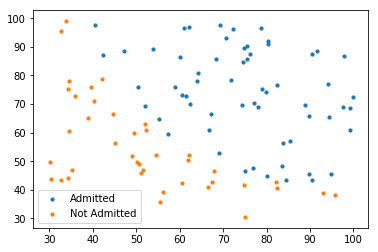

In [6]:
# X = feature values, all the columns except the last column
X = marks_df.iloc[:, :-1]

# y = target values, last column of the data frame
y = marks_df.iloc[:, -1]

# filter out the applicants that got admitted
admitted = marks_df.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = marks_df.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [7]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

# Train a Logistc Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression()

model.fit(X, y)

/Users/anush/anaconda3/envs/dart/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anush/anaconda3/envs/dart/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Test (Predict) the Linear Regression Model

In [9]:
predicted_classes = model.predict(X)

# Metrics

In [10]:
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_
print(accuracy)

0.91


# Plot the Output

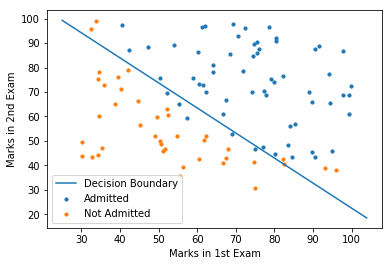

In [11]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
parameters = [[-25.16131856,0.20623159,0.20147149]]
y_values = - (parameters[0][0] + np.dot(parameters[0][1], x_values)) / parameters[0][2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()